In [188]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [189]:
#importing required libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [190]:
#Dataset Loading
st = pd.read_csv('/content/drive/My Drive/stress_dataset.csv')

Dataset Exploration and cleaning

In [191]:
#Load and view sample data
st.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [192]:
# Dataset Information
st.info()

print("Shape of the Dataset",st.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
Shape of the Dataset (

In [193]:
# Statistical Summary
st.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [194]:
# Identifying Null Values
st.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [195]:
# Since a Major part of the data in the sleep Disorder Column is Null, we can drop the dataset
st.drop('Sleep Disorder', axis=1, inplace=True)

In [196]:
st.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [197]:
st.shape

(374, 12)

In [198]:
# Checking the unique values for non-numerical features
occupation_unique_values = st['Occupation'].unique()
print("Unique values in 'Occupation' column:", occupation_unique_values)

bmi_unique_values = st['BMI Category'].unique()
print("Unique values in 'BMI' column:", bmi_unique_values)


Unique values in 'Occupation' column: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
Unique values in 'BMI' column: ['Overweight' 'Normal' 'Obese' 'Normal Weight']


In [200]:
# Since Normal weight and Normal are same, renaming the Normal weight to Normal for consistency
st['BMI Category'] = st['BMI Category'].replace('Normal weight', 'Normal')

In [201]:
# Since there are different categorical values, we can encode them into numerical data for Gender, Occupation, BMI Category, and Sleep Disorder Columns
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder=LabelEncoder()

categorical_cols=['Gender','Occupation','BMI Category']
for col in categorical_cols:
    st[col] = label_encoder.fit_transform(st[col])

st.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,1,27,9,6.1,6,42,6,3,126/83,77,4200
1,2,1,28,1,6.2,6,60,8,0,125/80,75,10000
2,3,1,28,1,6.2,6,60,8,0,125/80,75,10000
3,4,1,28,6,5.9,4,30,8,2,140/90,85,3000
4,5,1,28,6,5.9,4,30,8,2,140/90,85,3000


In [202]:
st.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [203]:
#Since person ID won't be a relevant feature for training this model, it can be dropped
st = st.drop('Person ID', axis=1)

In [204]:
#Here the blood pressure column is in string format and can be seperated into systolic and diastolic pressure and can be converted to numeric from string
st[['Systolic BP', 'Diastolic BP']] = st['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns to numeric type
st[['Systolic BP', 'Diastolic BP']] = st[['Systolic BP', 'Diastolic BP']].apply(pd.to_numeric)

# Drop the original 'Blood Pressure' column
st = st.drop('Blood Pressure', axis=1)

st.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic BP,Diastolic BP
0,1,27,9,6.1,6,42,6,3,77,4200,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,125,80
2,1,28,1,6.2,6,60,8,0,75,10000,125,80
3,1,28,6,5.9,4,30,8,2,85,3000,140,90
4,1,28,6,5.9,4,30,8,2,85,3000,140,90


In [205]:
st.shape

(374, 12)

In [206]:
# Here our Target feature is to find the stress level of a person based on the input data
#Checking the unique values for each stress level for the given dataset
st['Stress Level'].value_counts()

,count
Stress Level,
3,71
8,70
4,70
5,67
7,50
6,46


In [207]:
# checking the unique values for each feature
dict = {}
for i in list(st.columns):
    dict[i] = st[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
Gender,2
Age,31
Occupation,11
Sleep Duration,27
Quality of Sleep,6
Physical Activity Level,16
Stress Level,6
BMI Category,4
Heart Rate,19
Daily Steps,20


Data Visualization

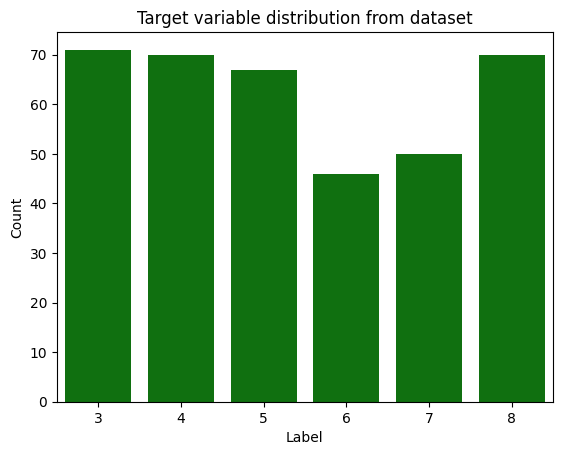

In [208]:
# Visualizing the stress levels of individuals
sns.countplot(x='Stress Level', data=st, color='green')

plt.xlabel('Label')

plt.ylabel('Count')

plt.title('Target variable distribution from dataset')

# Displaying the plot
plt.show()

In [209]:
#Occupation Distribution
occupation_counts = st['Occupation'].value_counts().reset_index()
occupation_counts.columns = ['Occupation', 'Count']

print(occupation_counts)

    Occupation  Count
0            5     73
1            1     71
2            2     63
3            3     47
4           10     40
5            0     37
6            7     32
7            9      4
8            8      4
9            6      2
10           4      1


In [210]:
#Since there is a major difference in the data for some of the occupation, we can drop them to reduce the noise from it
st = st[~st['Occupation'].isin([4, 6, 8, 9])]

In [211]:
#Occupation Distribution
occupation_counts = st['Occupation'].value_counts().reset_index()
occupation_counts.columns = ['Occupation', 'Count']

print(occupation_counts)

   Occupation  Count
0           5     73
1           1     71
2           2     63
3           3     47
4          10     40
5           0     37
6           7     32


In [212]:
fig = px.pie(
    occupation_counts,
    values='Count',
    names='Occupation',
    title='Distribution of Occupation',
    width=600,
    height=500
)

# Show the chart
fig.show()

In [213]:
st.shape

(363, 12)

<function matplotlib.pyplot.show(close=None, block=None)>

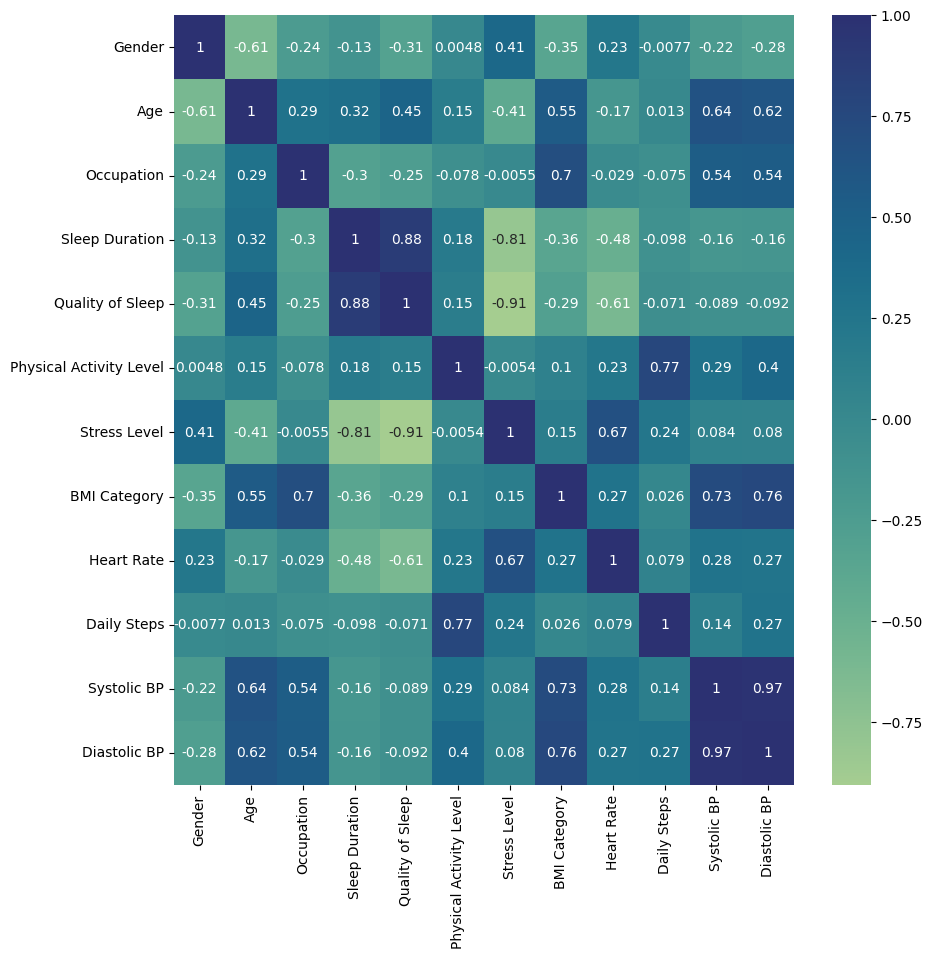

In [214]:
# Checking correaltions between the the features
plt.figure(figsize = (10, 10))
sns.heatmap(st.corr(), cmap = 'crest', annot = True)
plt.show

Based on the heat map
There is no correlation with the stress level and Occupation, Physical Activity Level. it's almost zero

So, we can drop Sleep Disorder and Physical Activity Level



In [215]:
st.drop('Occupation', axis=1, inplace=True)
st.drop('Physical Activity Level', axis=1, inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

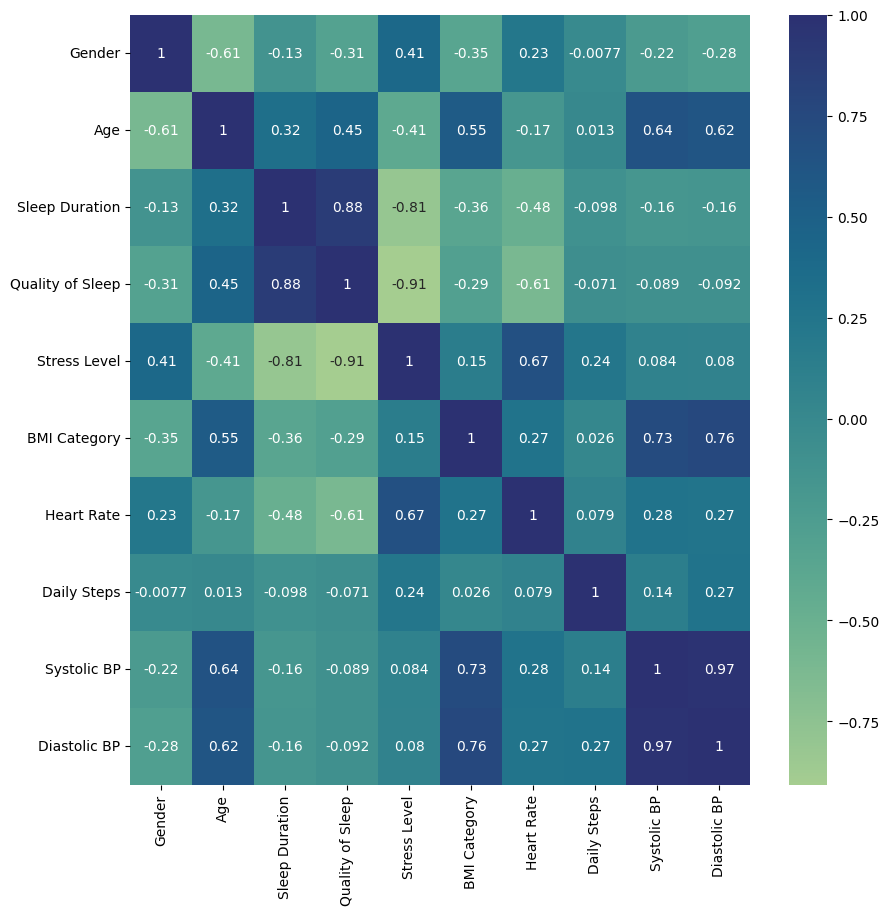

In [216]:
# Checking correaltions between the the features after dropping
plt.figure(figsize = (10, 10))
sns.heatmap(st.corr(), cmap = 'crest', annot = True)
plt.show

In [218]:
st.shape

(363, 10)

In [ ]:
# Importing required libraries for model training
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [220]:
#Splitting into training and target features
X = st.drop(['Stress Level'], axis=1)
y = st['Stress Level']

In [221]:
# Split the data into training and testing sets (80% data for training, 20% data for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [222]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((290, 9), (73, 9), (290,), (73,))

Training with Logistic Regression

In [223]:
# Model Fitting
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

predicted = model.predict(X_test)

# Confusion matrix
conf = confusion_matrix(y_test, predicted)
print("Confusion Matrix : \n", conf)

cr = classification_report(y_test, predicted, zero_division=0)
print("Classification Report:\n", cr)

# Printing the test accuracy
print("The test accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted) * 100, "%")


Confusion Matrix : 
 [[13  0  0  1  0  0]
 [ 0  8  0  3  0  4]
 [ 0  0 10  0  1  0]
 [ 0  1  0 11  1  0]
 [ 2  0  0  0  6  0]
 [ 0  0  0  1  5  6]]
Classification Report:
               precision    recall  f1-score   support

           3       0.87      0.93      0.90        14
           4       0.89      0.53      0.67        15
           5       1.00      0.91      0.95        11
           6       0.69      0.85      0.76        13
           7       0.46      0.75      0.57         8
           8       0.60      0.50      0.55        12

    accuracy                           0.74        73
   macro avg       0.75      0.74      0.73        73
weighted avg       0.77      0.74      0.74        73

The test accuracy of Logistic Regression is :  73.97260273972603 %


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Training with Random Forest

In [224]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
random_forest.fit(X_train, y_train)

random_forest.score(X_test,y_test)

y_predict = random_forest.predict(X_test)

matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)

report = classification_report(y_test, y_predict, zero_division=0)

# Print the classification report
print("Classification Report:")
print(report)

Confusion Matrix:
[[13  0  0  1  0  0]
 [ 0 15  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  1  0 12  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 12]]
Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.93      0.96        14
           4       0.94      1.00      0.97        15
           5       1.00      1.00      1.00        11
           6       0.92      0.92      0.92        13
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00        12

    accuracy                           0.97        73
   macro avg       0.98      0.98      0.98        73
weighted avg       0.97      0.97      0.97        73



In [225]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f}")

Cross-Validation Accuracy: 0.96


Decision Tree

In [226]:
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [227]:
decision_tree.score(X_test,y_test)

0.8904109589041096

In [228]:
y_predict = decision_tree.predict(X_test)

matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[13  0  0  1  0  0]
 [ 0 11  0  4  0  0]
 [ 0  0 11  0  0  0]
 [ 0  1  0 12  0  0]
 [ 0  0  0  2  6  0]
 [ 0  0  0  0  0 12]]


In [229]:
report = classification_report(y_test, y_predict, zero_division=0)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.93      0.96        14
           4       0.92      0.73      0.81        15
           5       1.00      1.00      1.00        11
           6       0.63      0.92      0.75        13
           7       1.00      0.75      0.86         8
           8       1.00      1.00      1.00        12

    accuracy                           0.89        73
   macro avg       0.92      0.89      0.90        73
weighted avg       0.92      0.89      0.89        73



In [230]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(decision_tree, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f}")

Cross-Validation Accuracy: 0.92


The Logistic regression is giving an accuracy of 74% and
The Random forest gives an accuracy of 97% and the Decision Trees gives an accuracy of 89%

Stress Level Prediction

In [184]:
import pandas as pd

def get_user_input():
    gender = int(input("Gender (Male: 1, Female: 0): "))
    age = int(input("Age: "))
    sleep_duration = float(input("Sleep Duration (hours): "))
    quality_of_sleep = int(input("Quality of Sleep (1-10): "))
    bmi_category = int(input("BMI Category (Normal: 0, Obese: 2, Overweight: 3): "))
    heart_rate = int(input("Heart Rate (bpm): "))
    daily_steps = int(input("Daily Steps: "))
    systolic_bp = int(input("Systolic BP: "))
    diastolic_bp = int(input("Diastolic BP: "))

    # Create a dictionary with feature names matching those used during training
    input_data = {
        "Gender": [gender],
        "Age": [age],
        "Sleep Duration": [sleep_duration],
        "Quality of Sleep": [quality_of_sleep],
        "BMI Category": [bmi_category],
        "Heart Rate": [heart_rate],
        "Daily Steps": [daily_steps],
        "Systolic BP": [systolic_bp],
        "Diastolic BP": [diastolic_bp],
    }

    # Convert to a DataFrame
    return pd.DataFrame(input_data)

Here, I am using decision tree for prediction of the stress level as it has more accuracy comparing other models

In [185]:
user_input = get_user_input()

predicted_stress_level = random_forest.predict(user_input)

Gender (Male: 1, Female: 0): 0
Age: 52
Sleep Duration (hours): 3
Quality of Sleep (1-10): 2
BMI Category (Normal: 0, Obese: 2, Overweight: 3): 2
Heart Rate (bpm): 56
Daily Steps: 3000
Systolic BP: 126
Diastolic BP: 90


In [186]:
print("Predicted Stress Level:", predicted_stress_level)

Predicted Stress Level: [8]


Converting the code to pkl file

In [ ]:
import joblib


# Save the model to Google Drive
joblib.dump(decision_tree, '/content/drive/My Drive/stress_prediction_RF_model.pkl')
print("Model saved successfully to Google Drive")

Model saved successfully to Google Drive
